2022-03-22 <br/>
Baby names <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-03-22/readme.md

Race bar chart - Completed <br/>
Race bar chart (3 lines) - Completed <br/>
Race bar chart (Experimental) - Incomplete

Original: https://towardsdatascience.com/bar-chart-race-with-plotly-f36f3a5df4f1  <br/>
Updated: https://towardsdatascience.com/making-a-bar-chart-race-plot-using-plotly-made-easy-8dad3b1da955 <br/>
Updated - Code: https://github.com/lucharo/raceplotly/blob/main/raceplotly/plots.py <br/>

In [11]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [12]:
from random import sample
import numpy as np
import datetime

import random

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-22/babynames.csv')

In [14]:
df.head()

,year,sex,name,n,prop
0,1880,F,Mary,7065,0.072384
1,1880,F,Anna,2604,0.026679
2,1880,F,Emma,2003,0.020521
3,1880,F,Elizabeth,1939,0.019866
4,1880,F,Minnie,1746,0.017888


In [15]:
df.columns

Index(['year', 'sex', 'name', 'n', 'prop'], dtype='object')

In [16]:
# Ranking all names based on counts
df["rank"] = df.groupby(["year","sex"])["n"].rank("dense", ascending=False)

In [17]:
df.head()

,year,sex,name,n,prop,rank
0,1880,F,Mary,7065,0.072384,1.0
1,1880,F,Anna,2604,0.026679,2.0
2,1880,F,Emma,2003,0.020521,3.0
3,1880,F,Elizabeth,1939,0.019866,4.0
4,1880,F,Minnie,1746,0.017888,5.0


In [18]:
df[df.year==1880]

,year,sex,name,n,prop,rank
0,1880,F,Mary,7065,0.072384,1.0
1,1880,F,Anna,2604,0.026679,2.0
2,1880,F,Emma,2003,0.020521,3.0
3,1880,F,Elizabeth,1939,0.019866,4.0
4,1880,F,Minnie,1746,0.017888,5.0
...,...,...,...,...,...,...
1995,1880,M,Woodie,5,0.000042,203.0
1996,1880,M,Worthy,5,0.000042,203.0
1997,1880,M,Wright,5,0.000042,203.0
1998,1880,M,York,5,0.000042,203.0


In [19]:
# the 10 most common male names
df_man = df[(df['sex'] == 'M')&(df['rank'] <= 10.0)]

In [20]:
df_man.name.value_counts()

James          117
William        110
Robert         109
John           108
Charles         75
Michael         74
Joseph          70
George          58
Thomas          58
David           57
Richard         51
Frank           43
Christopher     43
Edward          40
Matthew         37
Daniel          31
Joshua          31
Jacob           25
Henry           23
Andrew          21
Donald          20
Mark            16
Ethan           15
Brian           13
Jason           13
Nicholas        10
Ronald          10
Noah             9
Tyler            9
Steven           8
Alexander        8
Brandon          7
Harry            7
Mason            7
Liam             6
Anthony          6
Jayden           5
Gary             5
Jeffrey          5
Justin           4
Austin           4
Benjamin         3
Aiden            3
Larry            2
Elijah           2
Walter           1
Oliver           1
Logan            1
Scott            1
Name: name, dtype: int64

In [21]:



def name_to_color(names, r_min=0, r_max=255, g_min=0, g_max=255, b_min=0, b_max=255):
    """Mapping of names to random rgb colors.
    Parameters:
    df (Series): Pandas Series containing names.
    r_min (int): Mininum intensity of the red channel (default 0).
    r_max (int): Maximum intensity of the red channel (default 255).
    g_min (int): Mininum intensity of the green channel (default 0).
    g_max (int): Maximum intensity of the green channel (default 255).
    b_min (int): Mininum intensity of the blue channel (default 0).
    b_max (int): Maximum intensity of the blue channel (default 255).
    Returns:
    dictionary: Mapping of names (keys) to random rgb colors (values)
    """
    mapping_colors = dict()
    
    for name in names.unique():
        red = random.randint(r_min, r_max)
        green = random.randint(g_min, g_max)
        blue = random.randint(b_min, b_max)
        rgb_string = 'rgb({}, {}, {})'.format(red, green, blue)
    
        mapping_colors[name] = rgb_string
    
    return mapping_colors

In [22]:
# dictionary for male names
mapping_colors_man = name_to_color(df_man.name, 125, 255, 0, 185, 0, 185)

# show the mapping
print(mapping_colors_man)

{'John': 'rgb(214, 138, 7)', 'William': 'rgb(148, 69, 111)', 'James': 'rgb(127, 60, 154)', 'Charles': 'rgb(150, 118, 28)', 'George': 'rgb(253, 41, 51)', 'Frank': 'rgb(198, 4, 182)', 'Joseph': 'rgb(179, 76, 145)', 'Thomas': 'rgb(235, 70, 108)', 'Henry': 'rgb(231, 12, 6)', 'Robert': 'rgb(201, 119, 159)', 'Edward': 'rgb(134, 51, 84)', 'Harry': 'rgb(164, 19, 93)', 'Walter': 'rgb(239, 5, 31)', 'Richard': 'rgb(175, 49, 115)', 'Donald': 'rgb(222, 58, 22)', 'David': 'rgb(174, 66, 146)', 'Ronald': 'rgb(129, 180, 146)', 'Michael': 'rgb(241, 33, 116)', 'Larry': 'rgb(125, 121, 112)', 'Gary': 'rgb(181, 127, 171)', 'Steven': 'rgb(238, 109, 28)', 'Mark': 'rgb(185, 105, 83)', 'Jeffrey': 'rgb(237, 133, 113)', 'Christopher': 'rgb(209, 107, 41)', 'Brian': 'rgb(190, 184, 97)', 'Jason': 'rgb(180, 148, 99)', 'Scott': 'rgb(230, 29, 63)', 'Matthew': 'rgb(217, 79, 161)', 'Daniel': 'rgb(247, 38, 14)', 'Joshua': 'rgb(201, 100, 108)', 'Andrew': 'rgb(197, 123, 175)', 'Justin': 'rgb(149, 112, 41)', 'Brandon': 'rgb(

In [23]:
# create a column Color - matching colors with names (according to the mapping_colors_man dictionary)
df_man['Color'] = df_man['name'].map(mapping_colors_man)

# first five rows of the df_man data frame
df_man.head()

D:\Users\DComputer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,sex,name,n,prop,rank,Color
942,1880,M,John,9655,0.081546,1.0,"rgb(214, 138, 7)"
943,1880,M,William,9532,0.080507,2.0,"rgb(148, 69, 111)"
944,1880,M,James,5927,0.050059,3.0,"rgb(127, 60, 154)"
945,1880,M,Charles,5348,0.045169,4.0,"rgb(150, 118, 28)"
946,1880,M,George,5126,0.043294,5.0,"rgb(253, 41, 51)"


In [47]:
def frames_animation(df, title):
    """Creation of a sequence of frames.
    Parameters:
    df (DataFrame): Pandas data frame containing the categorical variable ['Name'],
    the count ['Number'], the year ['Year'], and the color['Color'] (separated columns).
    title (string): Title of each frame.
    Returns:
    list_of_frames (list): List of frames. Each frame contains a bar plot of a year.
    """
    
    list_of_frames = []
    initial_year = df['year'].min()
    final_year = df['year'].max()

    for year in range(initial_year, final_year):
            fdata = df[df['year'] == year]
            list_of_frames.append(go.Frame(data=[go.Bar(x=fdata['name'], y=fdata['n'],
                                                        marker_color=fdata['Color'], hoverinfo='none',
                                                        textposition='outside', texttemplate='%{x}<br>%{y}',
                                                        cliponaxis=False)],
                                           layout=go.Layout(font={'size': 14},
                                                            plot_bgcolor = '#FFFFFF',
                                                            xaxis={'showline': False, 'visible': False},
                                                            yaxis={'showline': False, 'visible': False},
                                                            bargap=0.15,
                                                            title=title + str(year))))
    return list_of_frames

In [48]:
def bar_race_plot (df, title, list_of_frames):
    """Creation of the bar chart race figure.
    Parameters:
    df (DataFrame): Pandas data frame containing the categorical variable ['Name'],
    the count ['Number'], the year ['Year'], and the color ['Color'] (separated columns).
    title (string): Title of the initial bar plot.
    list_of_frames (list): List of frames. Each frame contains a bar plot of a year.
    Returns:
    fig (figure instance): Bar chart race
    """
    
    # initial year - names (categorical variable), number of babies (numerical variable), and color
    initial_year = df['year'].min()
    initial_names = df[df['year'] == initial_year].name
    initial_numbers = df[df['year'] == initial_year].n
    initial_color = df[df['year'] == initial_year].Color
    range_max = df['n'].max()
    
    fig = go.Figure(
        data=[go.Bar(x=initial_names, y=initial_numbers,
                       marker_color=initial_color, hoverinfo='none',
                       textposition='outside', texttemplate='%{x}<br>%{y}',
                       cliponaxis=False)],
        layout=go.Layout(font={'size': 14}, plot_bgcolor = '#FFFFFF',
                         xaxis={'showline': False, 'visible': False},
                         yaxis={'showline': False, 'visible': False, 'range': (0, range_max)},
                         bargap=0.15, title=title + str(initial_year),
                         updatemenus=[dict(type="buttons",
                                           buttons=[dict(label="Play",
                                                         method="animate",
                                                         args=[None,{"frame": {"duration": 200, "redraw": True}, "fromcurrent": True}]),
                                                    dict(label="Stop",
                                                         method="animate",
                                                         args=[[None],{"frame": {"duration": 0, "redraw": False}, "mode": "immediate","transition": {"duration": 0}}])])]),
        frames=list(list_of_frames))
    
    return fig

In [26]:
df_man.tail()

,year,sex,name,n,prop,rank,Color
1910510,2017,M,Benjamin,13733,0.006995,6.0,"rgb(181, 169, 60)"
1910511,2017,M,Mason,13502,0.006877,7.0,"rgb(153, 26, 137)"
1910512,2017,M,Elijah,13268,0.006758,8.0,"rgb(232, 156, 49)"
1910513,2017,M,Oliver,13141,0.006693,9.0,"rgb(223, 33, 12)"
1910514,2017,M,Jacob,13106,0.006676,10.0,"rgb(224, 181, 80)"


In [36]:
from plotly.offline import plot

In [54]:
# animated bar chart of baby names - boys 
title = 'Most popular baby names of '
list_of_frames = frames_animation(df_man, title)
fig = bar_race_plot(df_man, title, list_of_frames)
fig.show()

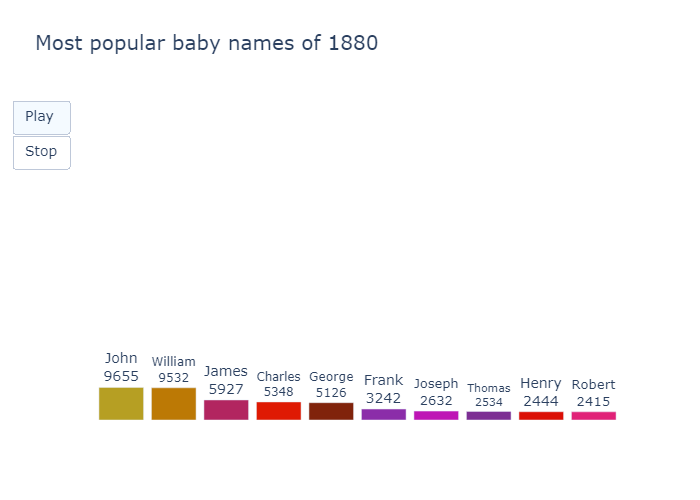

In [55]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [56]:
# Same animation in 3 Lines
import plotly.express as px

fig = px.bar(df_man, x="name", y="n", color="Color",
  animation_frame="year")
fig.update_layout(showlegend=False)
fig.show()

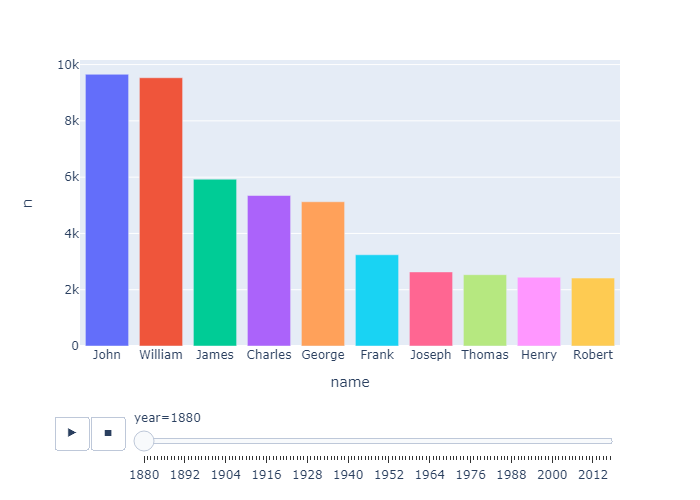

In [57]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

### Experimental 

In [52]:
def __check_orientation(orientation,item_column, value_column):

        if orientation == 'horizontal':
            x = value_column
            y = item_column
        elif orientation == 'vertical':
            y = value_column
            x = item_column
        else:
            raise Exception('Please provide a valid value for orientation: horizontal or vertical')

        return x, y


In [ ]:
def __make_frame1(df, time_column,item_column, value_column, top_entries, orientation, time_frame1 = 'min'):
        """
        Internal use
        time_frame1 can be a number that equals one of the entries in the time column
        or key values such as 'min' or 'max'
        """

        if time_frame1 == 'min':
            time_frame1 = df[time_column].min()
        elif time_frame1 == 'max':
            time_frame1 = df[time_column].max()

        # filter by year
        frame1 = df[df[time_column] == time_frame1]

        # get top entries
        frame1  = frame1.sort_values(value_column, ascending=False).iloc[:top_entries,:]

        # return in ascending order so that top bar corresponds to largest value
        frame1 = frame1.sort_values(value_column, ascending=True)

        x, y = __check_orientation(orientation,item_column, value_column)

        # Create figure
        fig = go.Figure(
            data=[
                go.Bar(
                    x=frame1[x],
                    y=frame1[y],
                    marker_color=frame1['color'],
                    hoverinfo='all',
                    textposition='outside',
                    texttemplate='%{x}<br>%{y:.4s}' if orientation == 'vertical' else '%{y}<br>%{x:.4s}',
                    textangle= 0,
                    cliponaxis=False,
                    orientation = 'h' if orientation == 'horizontal' else 'v'
                )
            ],
            layout=go.Layout(
                font={'size': 14},
                plot_bgcolor = '#FFFFFF',
                xaxis={
                    'showline': False,
                    'visible': False
                } if orientation == 'vertical' else
                {
                    'showline': True,
                    'visible': True,
                    'range': (0, df[value_column].max())
                },
                yaxis={
                    'showline': True,
                    'visible': True,
                    'range': (0, df[value_column].max())
                } if orientation == 'vertical' else
                {
                    'showline': False,
                    'visible': False
                },
                bargap=0.15,
                title= title
            ),
            frames = []
        )

In [ ]:
def __make_frames(df,time_column, date_format,value_column,top_entries, orientation,sliders_dict, title: str, frame_duration: int):
        '''
        bar_race.make_frames automatically makes frame fromt the earliest to the latest available time stamp
        '''

        x, y = __check_orientation()
        frames = []
        ## sorted date to iterate through them
        dates = np.sort(df[time_column].unique())
        for date in dates:

            # specified date string for plotly frame id and for printing in plot
            if isinstance(date, np.datetime64):
                date = pd.to_datetime(str(date))
                try:
                    date_str = date.strftime(format = date_format) if date_format is not None else str(date)
                except:
                    raise Exception("Something was wrong setting the date_format, please check the strftime (https://strftime.org/) documentation for date formatting and try again")
            else:
                date_str = str(date)

            # filter out by year
            snap_data = df[df[time_column] == date]

            # get_top 10
            snap_data = snap_data.sort_values(value_column, ascending=False).iloc[:top_entries,:]

            # get top enttry at top of chart
            snap_data = snap_data.sort_values(value_column, ascending=True)

            # make frame
            frames.append(
                go.Frame(
                    data=[
                        go.Bar(
                            x=snap_data[x],
                            y=snap_data[y],
                            marker_color=snap_data['color'],
                            cliponaxis=False,
                            hoverinfo='all',
                            hovertemplate = '<extra></extra>', #annoying and obscure, see docs
                            ## (https://community.plotly.com/t/remove-trace-0-next-to-hover/33731)
                            textposition='outside',
                            texttemplate='%{x}<br>%{y:.4s}' if orientation == 'vertical' else '%{y}<br>%{x:.4s}',
                            textangle = 0,
                            orientation = 'h' if orientation == 'horizontal' else 'v'
                        )
                    ],
                    layout=go.Layout(
                        font={'size': 14},
                        plot_bgcolor = '#FFFFFF',
                        xaxis={
                            'showline': False,
                            'visible': True
                        } if orientation == 'vertical' else
                        {
                            'showline': True,
                            'visible': True,
                            'range': (0, df[value_column].max())
                        },
                        yaxis={
                            'showline': True,
                            'visible': True,
                            'range': (0, df[value_column].max())
                        } if orientation == 'vertical' else
                        {
                            'showline': False,
                            'visible': True
                        },
                        bargap=0.15,
                        title= title
                    ),
                    name = date_str
                )
            )

            slider_step = {"args": [
                [date_str],
                {"frame": {"duration": frame_duration, "redraw": False},
                 "mode": "immediate",
                 "transition": {"duration": frame_duration}}
            ],
                           "label": date_str,
                           "method": "animate"}
            sliders_dict["steps"].append(slider_step)


        return frames

In [ ]:
def __define_ui(time_label: str = None):

        fig["layout"]["updatemenus"] = [
            {
                "buttons": [
                    {
                        "args": [None, {"frame": {"duration": 500, "redraw": False},
                                        "fromcurrent": True, "transition": {"duration": 300,
                                                                            "easing": "quadratic-in-out"}}],
                        "label": "Play",
                        "method": "animate"
                    },
                    {
                        "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                          "mode": "immediate",
                                          "transition": {"duration": 0}}],
                        "label": "Pause",
                        "method": "animate"
                    }
                ],
                "direction": "left",
                "pad": {"r": 10, "t": 87},
                "showactive": True,
                "type": "buttons",
                "x": 0.1,
                "xanchor": "right",
                "y": 0,
                "yanchor": "top"
            }
        ]

        sliders_dict = {
            "active": 0,
            "yanchor": "top",
            "xanchor": "left",
            "currentvalue": {
                "font": {"size": 20},
                "prefix": time_label,
                "visible": True,
                "xanchor": "right"
            },
            "transition": {"duration": 300, "easing": "cubic-in-out"},
            "pad": {"b": 10, "t": 50},
            "len": 0.9,
            "x": 0.1,
            "y": 0,
            "steps": [] # empty, gets filled when frames are made
        }

In [51]:
def __get_colors(df,item_column:str = None,item_color=None):
        if (item_color == None):
            colors = {item: 'rgb({}, {}, {})'.format(*sample(range(256), 3)) for item in df[item_column].unique()}
            df['color'] = df[item_column].map(colors)
        elif (item_color != None and len(item_color) != df[item_column].nunique()):
            for item in df[item_column].unique():
                if item not in item_color.keys():
                    item_color[item] = 'rgb({}, {}, {})'.format(*sample(range(256), 3))
            df['color'] = df[item_column].map(item_color)
        else:
            df=df.rename(columns={item_color: "color"})


In [ ]:

def plot(title: str = None, orientation: str = 'horizontal', initial_frame = 'min', value_label: str = None, item_label: str = None, time_label: str = 'Date: ', frame_duration: int = 500, date_format: str = None, data = None, item_column: str = None, value_column: str = None,  time_column:str = None):
        '''
        By default the time variable is appended to the title string
        * orientation: if this is horizontal the value_column is the x-axis, if this is set to
        vertical the value_column is the y_axis
        '''

        orientation = orientation # record last orientation used
        date_format = date_format # record last date_format
        title = title

        #get colors
        __get_colors(data,  item_column)

        # make frame1, the one that appears before the animation play
        __make_frame1(df, time_column,item_column, value_column, top_entries, orientation, time_frame1)

        # define ui: adds Play,Pause buttons and defines empty slider
        __define_ui(time_label)

        # make frames, also updates sliders at each frame
        fig['frames'] = __make_frames(title, frame_duration)

        # update sliders in layout to sliders_dict with all the steps defined
        fig["layout"]["sliders"] = [sliders_dict]

        if (item_label is not None) or (value_label is not None):
            if orientation == 'horizontal':
                fig.update_xaxes(title_text= value_label,
                        visible = True, showticklabels= True)
                fig.update_yaxes(title_text= item_label,
                        visible = True, showticklabels= False)
            else:
                fig.update_xaxes(title_text= item_label,
                        visible = True, showticklabels= False)
                fig.update_yaxes(title_text= value_label,
                        visible = True, showticklabels= True)

        fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = frame_duration
        fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = frame_duration

        return fig

In [ ]:
#my_raceplot = barplot(data,  item_column='Item', value_column='Value', time_column='Year')

# my_raceplot.plot(item_label = 'Top 10 crops', value_label = 'Production quantity (tonnes)', frame_duration = 800, data=df_man,  item_column='name', value_column='n', time_column='year')